In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%gui qt

In [3]:
from spiketag.base import mua_kernel as kernel

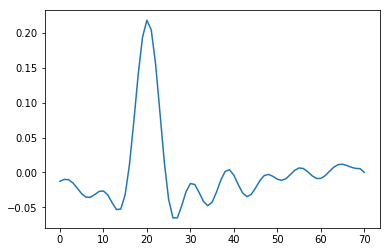

In [4]:
plot(kernel)

## deconvolve single channel (make sure the fs=25000.)

In [5]:
from spiketag.base.Binload import _deconvolve
from spiketag.base import bload

In [6]:
bf = bload(nCh=3, fs=25000.)

In [7]:
bf.load('./cell_0109_mua_25000Hz.bin', dtype='float32')

2018-10-16 02:53:14,119 - spiketag - INFO - #############  load data  ###################
2018-10-16 02:53:14,123 - spiketag - INFO - ./cell_0109_mua_25000Hz.bin loaded, it contains: 
2018-10-16 02:53:14,124 - spiketag - INFO - 11600119 * 3 points (139201428 bytes) 
2018-10-16 02:53:14,126 - spiketag - INFO - 3 channels with sampling rate of 25000.0000 
2018-10-16 02:53:14,127 - spiketag - INFO - 464.005 secs (7.733 mins) of data
2018-10-16 02:53:14,129 - spiketag - INFO - #############################################


In [8]:
data = bf.data.numpy().reshape(-1,3)
x = data[:,2]

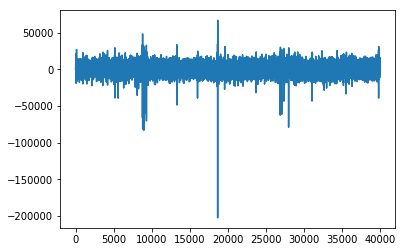

In [9]:
plot(x[:40000])

In [10]:
y = _deconvolve(x, kernel)

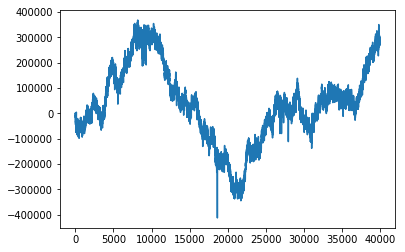

In [11]:
plot(y[:40000])

## deconvolve the whole binary file (make sure the fs=25000.)

In [12]:
bf = bload(nCh=3, fs=25000.)

In [13]:
bf.load('./cell_0109_mua_25000Hz.bin', dtype='float32')

2018-10-16 02:53:29,483 - spiketag - INFO - #############  load data  ###################
2018-10-16 02:53:29,487 - spiketag - INFO - ./cell_0109_mua_25000Hz.bin loaded, it contains: 
2018-10-16 02:53:29,489 - spiketag - INFO - 11600119 * 3 points (139201428 bytes) 
2018-10-16 02:53:29,490 - spiketag - INFO - 3 channels with sampling rate of 25000.0000 
2018-10-16 02:53:29,494 - spiketag - INFO - 464.005 secs (7.733 mins) of data
2018-10-16 02:53:29,495 - spiketag - INFO - #############################################


In [14]:
bf.deconvolve(kernel)

deconvolve 0th channel
deconvolve 1th channel
deconvolve 2th channel


In [15]:
bf.show()